In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

from sklearn.decomposition import PCA

import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 불러오기

매출 관련 데이터

In [ ]:
df_earned = pd.read_excel("/Users/jeongsooyoon/Desktop/DSL/24-2 EDA (경영)/df_earned_23.xlsx")
df_earned.head()

,기준_년분기_코드,자치구_코드,자치구_코드_명,서비스_업종_코드,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,주중_매출_금액,주말_매출_금액,월요일_매출_금액,...,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수
0,20191,11110,종로구,CS100004,식당,21733503173,586239,15141392928,6592110245,2473306312,...,210914,51176,244199,295978,6781,212438,144750,90539,62719,22943
1,20191,11110,종로구,CS100007,식당,3247811505,111086,2414124197,833687308,387818146,...,40712,38887,60952,43654,2077,34735,25143,20359,16465,5826
2,20191,11110,종로구,CS200006,필수의료,14993800118,538455,13153901584,1839898534,2847348305,...,82087,320,267337,270382,3352,72058,122236,124040,115864,100169
3,20191,11110,종로구,CS300018,소매(의료),33876865110,1253099,27361722154,6515142956,5327028136,...,281042,12225,649561,600431,4939,191069,243611,246369,250351,313652
4,20191,11110,종로구,CS300019,소매(의료),9397765181,99260,7877465392,1520299789,1299088550,...,13519,67,54869,42409,6,2444,7529,12205,20169,54927


In [ ]:
df_earned.columns

Index(['기준_년분기_코드', '자치구_코드', '자치구_코드_명', '서비스_업종_코드', '당월_매출_금액', '당월_매출_건수',
       '주중_매출_금액', '주말_매출_금액', '월요일_매출_금액', '화요일_매출_금액', '수요일_매출_금액',
       '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액', '일요일_매출_금액', '시간대_00~06_매출_금액',
       '시간대_06~11_매출_금액', '시간대_11~14_매출_금액', '시간대_14~17_매출_금액',
       '시간대_17~21_매출_금액', '시간대_21~24_매출_금액', '남성_매출_금액', '여성_매출_금액',
       '연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액', '연령대_40_매출_금액',
       '연령대_50_매출_금액', '연령대_60_이상_매출_금액', '주중_매출_건수', '주말_매출_건수', '월요일_매출_건수',
       '화요일_매출_건수', '수요일_매출_건수', '목요일_매출_건수', '금요일_매출_건수', '토요일_매출_건수',
       '일요일_매출_건수', '시간대_건수~06_매출_건수', '시간대_건수~11_매출_건수', '시간대_건수~14_매출_건수',
       '시간대_건수~17_매출_건수', '시간대_건수~21_매출_건수', '시간대_건수~24_매출_건수', '남성_매출_건수',
       '여성_매출_건수', '연령대_10_매출_건수', '연령대_20_매출_건수', '연령대_30_매출_건수',
       '연령대_40_매출_건수', '연령대_50_매출_건수', '연령대_60_이상_매출_건수'],
      dtype='object')

In [ ]:
#df_earned = df_earned.drop(columns=[''])

# 특정 컬럼들만 선택
selected_columns = ['서비스_업종_코드_명', '다른_컬럼']
df_selected = df_earned[selected_columns]

개폐업률 관련 데이터

In [ ]:
df_closed = pd.read_csv("/Users/jeongsooyoon/Desktop/DSL/24-2 EDA (경영)/df_closed_23.csv")
df_closed.head()

,기준_년분기_코드,자치구_코드,자치구_코드_명,서비스_업종_코드,서비스_업종_코드_명,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수
0,20241,11740,강동구,CS300043,소매(전자제품),2018.0,2022.0,0.1,3.0,5.8,117.0,4.0
1,20241,11740,강동구,CS300039,소매(운송),19.0,19.0,0.0,0.0,0.0,0.0,0.0
2,20241,11740,강동구,CS300038,소매(운송),91.0,93.0,1.1,1.0,1.1,1.0,2.0
3,20241,11740,강동구,CS300036,소매(가구),137.0,137.0,0.0,0.0,2.9,4.0,0.0
4,20241,11740,강동구,CS300032,소매(전자제품),137.0,137.0,0.0,0.0,3.6,5.0,0.0


In [ ]:
df_closed = df_closed[['서비스_업종_코드_명','점포_수','유사_업종_점포_수','개업_점포_수','폐업_점포_수','프랜차이즈_점포_수']]

In [ ]:
#자치구 코드명, 점포수, 유사 업종 접포수, 개업 점포 수, 폐업 점포 수, 프랜차이즈 수 사용하여 클러스터링
df_closed_norm = df_closed.copy()
scaler = preprocessing.MinMaxScaler()
df_closed_norm[['점포_수','유사_업종_점포_수','개업_점포_수','폐업_점포_수','프랜차이즈_점포_수']] =\
    scaler.fit_transform(df_closed_norm[['점포_수','유사_업종_점포_수','개업_점포_수','폐업_점포_수','프랜차이즈_점포_수']])


In [ ]:
#pip install kmodes
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

In [ ]:
df_closed_norm.head()

,서비스_업종_코드_명,점포_수,유사_업종_점포_수,개업_점포_수,폐업_점포_수,프랜차이즈_점포_수
0,소매(전자제품),0.138226,0.138292,0.003322,0.213894,0.004206
1,소매(운송),0.001234,0.001232,0.000000,0.000000,0.000000
2,소매(운송),0.006168,0.006295,0.001107,0.001828,0.002103
3,소매(가구),0.009320,0.009306,0.000000,0.007313,0.000000
4,소매(전자제품),0.009320,0.009306,0.000000,0.009141,0.000000


In [ ]:
kproto = KPrototypes(n_clusters=5, init='Cao')
clusters = kproto.fit_predict(df_closed_norm, categorical=[0])


In [ ]:
#join data with labels
labels = pd.DataFrame(clusters)
labeledClosed = pd.concat((df_closed_norm,labels),axis=1)
labeledClosed = labeledClosed.rename({0:'labels'},axis=1)

In [ ]:
#labeledClosed.to_csv('labeledClosed.csv', index=False)

### 클러스터링 결과 불러오기

In [ ]:
df = pd.read_csv('labeledClosed.csv')
df['서비스_업종_코드_명'].unique()

array(['소매(전자제품)', '소매(운송)', '소매(가구)', '반려동물', '소매(서적/문구)', '소매(스포츠)',
       '소매(미용)', '소매(의료)', '소매(안경)', '소매(의류)', '소매(식품)', '소매(생활)',
       '교육/학원', '스포츠/여가', '숙박업', '부동산', '전자제품 관련 서비스', '미용', '차량 관련 서비스',
       '필수의료', '카페 및 베이커리', '주점', '식당'], dtype=object)

In [ ]:
df = pd.read_csv('translated_labeledClosed.csv')
df.head()

,Service_Industry_Code_Name,Number_of_Stores,Number_of_Similar_Industry,Number_of_Opening,Number_of_Closing,Number_of_Franchise,Labels
0,Retail (Electronics),0.138226,0.138292,0.003322,0.213894,0.004206,3
1,Retail (Transportation),0.001234,0.001232,0.000000,0.000000,0.000000,2
2,Retail (Transportation),0.006168,0.006295,0.001107,0.001828,0.002103,2
3,Retail (Furniture),0.009320,0.009306,0.000000,0.007313,0.000000,2
4,Retail (Electronics),0.009320,0.009306,0.000000,0.009141,0.000000,2


In [ ]:
# Reduce the sample size for performance
df_sample_100 = df.sample(n=100, random_state=42)
df_sample_1000 = df.sample(n=500, random_state=42)
# Create the figure and axes
#fig, axes = plt.subplots(1, 4, figsize=(20, 5))


### 시각화

In [ ]:
df_sample_100['Service_Industry_Code_Name'].unique()

array(['Sports/Leisure', 'Essential Medical',
       'Electronics Related Services', 'Retail (Electronics)',
       'Retail (Furniture)', 'Restaurant', 'Retail (Sports)',
       'Beauty Services', 'Vehicle Related Services', 'Education/Academy',
       'Retail (Transportation)', 'Cafe and Bakery', 'Retail (Food)',
       'Lodging', 'Retail (Optics)', 'Retail (Books/Stationery)',
       'Retail (Clothing)', 'Pub', 'Retail (Household)',
       'Retail (Medical)', 'Retail (Beauty)'], dtype=object)

그래프 시각화를 위해 임의로 업종 2개로 나눔

In [ ]:
values_to_extract = ['Sports/Leisure', 'Essential Medical',
       'Electronics Related Services', 'Retail (Electronics)',
       'Retail (Furniture)', 'Restaurant', 'Retail (Sports)',
       'Beauty Services', 'Vehicle Related Services', 'Education/Academy',
       'Retail (Transportation)', 'Cafe and Bakery', 'Retail (Food)',
       'Lodging', 'Retail (Optics)', 'Retail (Books/Stationery)',
       'Retail (Clothing)', 'Pub', 'Retail (Household)',
       'Retail (Medical)', 'Retail (Beauty)']

df_sample_1000_category1 = df_sample_1000[df_sample_1000['Service_Industry_Code_Name'].isin(values_to_extract[:12])]
df_sample_1000_category2 = df_sample_1000[df_sample_1000['Service_Industry_Code_Name'].isin(values_to_extract[12:])]

,Service_Industry_Code_Name,Number_of_Stores,Number_of_Similar_Industry,Number_of_Opening,Number_of_Closing,Number_of_Franchise,Labels
1398,Sports/Leisure,0.000137,0.000137,0.000000,0.000000,0.000000,0
30936,Essential Medical,0.010348,0.010333,0.003322,0.003656,0.000000,2
1253,Sports/Leisure,0.004043,0.004106,0.007752,0.007313,0.001052,0
16510,Electronics Related Services,0.006579,0.006569,0.003322,0.001828,0.000000,2
10721,Retail (Electronics),0.291530,0.291912,0.005537,0.250457,0.012618,3
...,...,...,...,...,...,...,...
1487,Restaurant,0.015968,0.017175,0.015504,0.029250,0.018927,1
36498,Retail (Transportation),0.001850,0.001848,0.000000,0.000000,0.000000,2
13066,Retail (Transportation),0.011924,0.011906,0.002215,0.005484,0.000000,0
2323,Sports/Leisure,0.006579,0.006706,0.005537,0.005484,0.002103,0


분류 1에서의 클러스터링 결과

x축은 업종명, y축은 클러스터 라벨. 각 업종은 x축 기준 가장 긴 선이 해당하는 라벨로 분류

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 64.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 52.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 40.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 23.1% of the points cannot be placed; you may want to decrease the size of the markers or use s

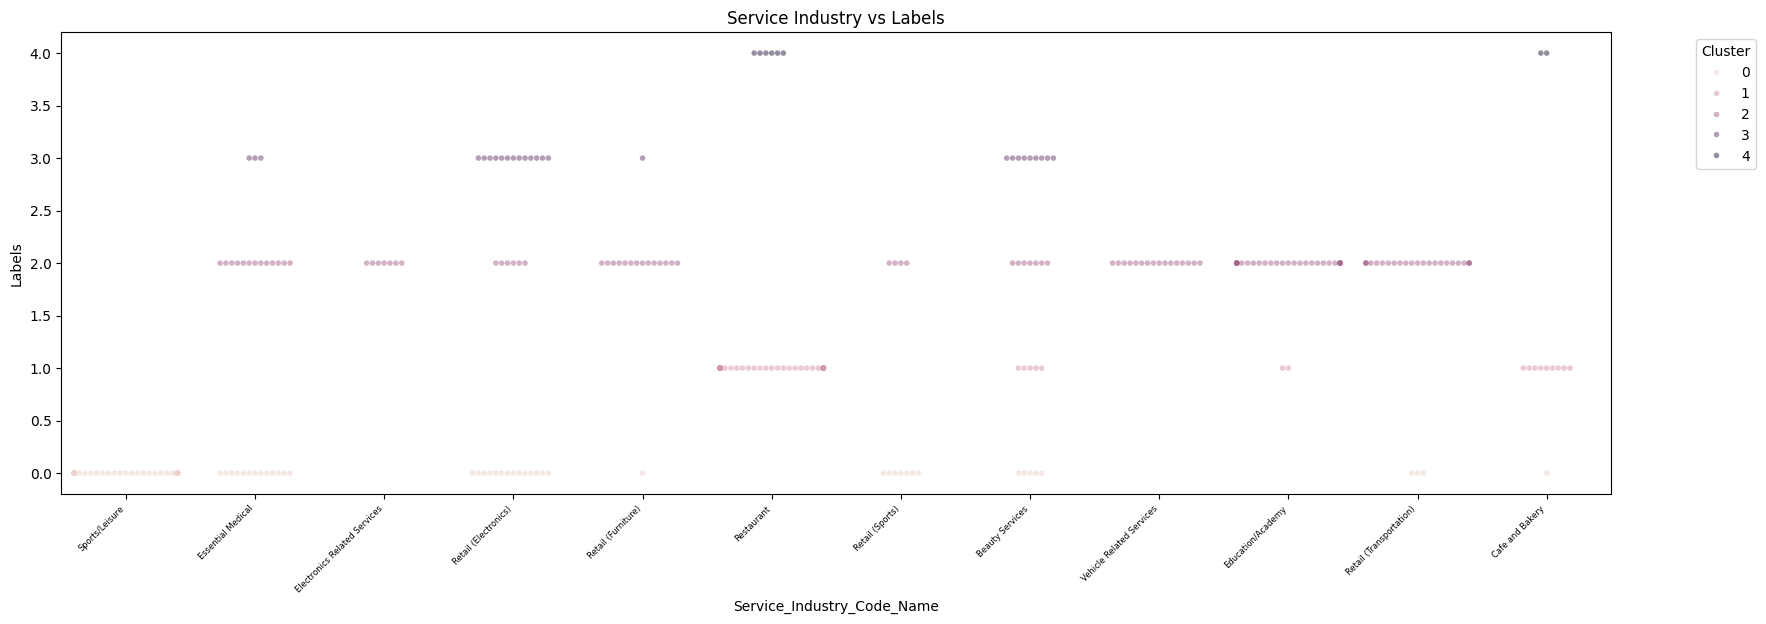

In [ ]:
## Category 1
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(20, 6))
#sns.violinplot(x='Service_Industry_Code_Name', y='Labels', data=df_sample_1000, inner=None, palette='Set2')
sns.swarmplot(x='Service_Industry_Code_Name', y='Labels', hue='Labels', data=df_sample_1000_category1, dodge=False, alpha=0.5, s=4)
#sns.stripplot(x='Service_Industry_Code_Name', y='Labels', hue='Labels', data=df_sample_1000, dodge=True, jitter=True, alpha=0.5, s=6)
plt.title('Service Industry vs Labels')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tick_params(axis='x', rotation=45, labelsize=6)

분류 2에서의 클러스터링 결과

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 18.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


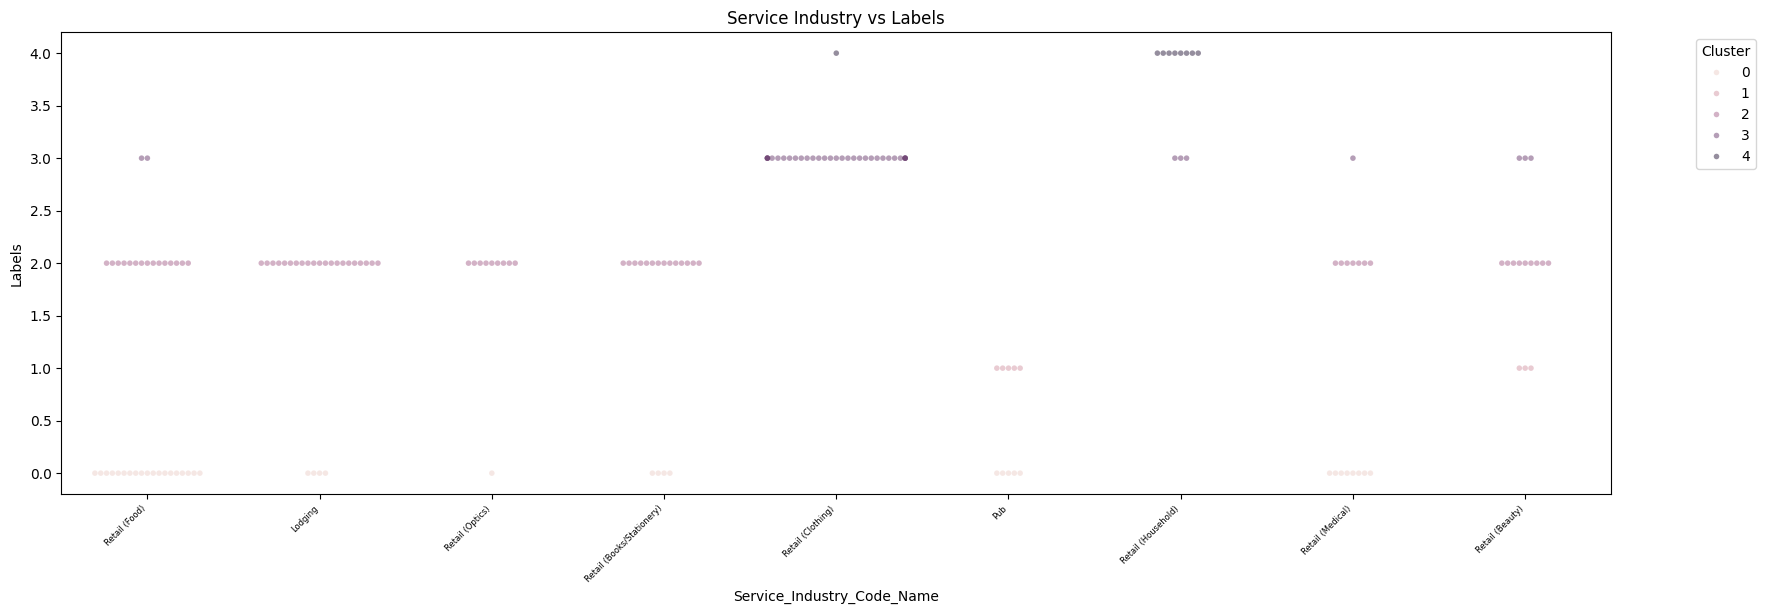

In [ ]:
## Category 2

plt.figure(figsize=(20, 6))
#sns.violinplot(x='Service_Industry_Code_Name', y='Labels', data=df_sample_1000, inner=None, palette='Set2')
sns.swarmplot(x='Service_Industry_Code_Name', y='Labels', hue='Labels', data=df_sample_1000_category2, dodge=False, alpha=0.5, s=4)
#sns.stripplot(x='Service_Industry_Code_Name', y='Labels', hue='Labels', data=df_sample_1000, dodge=True, jitter=True, alpha=0.5, s=6)
plt.title('Service Industry vs Labels')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tick_params(axis='x', rotation=45, labelsize=6)

전체 시각화

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 81.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 27.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 27.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 31.2% of the points cannot be placed; you may want to decrease the size of the markers or use s

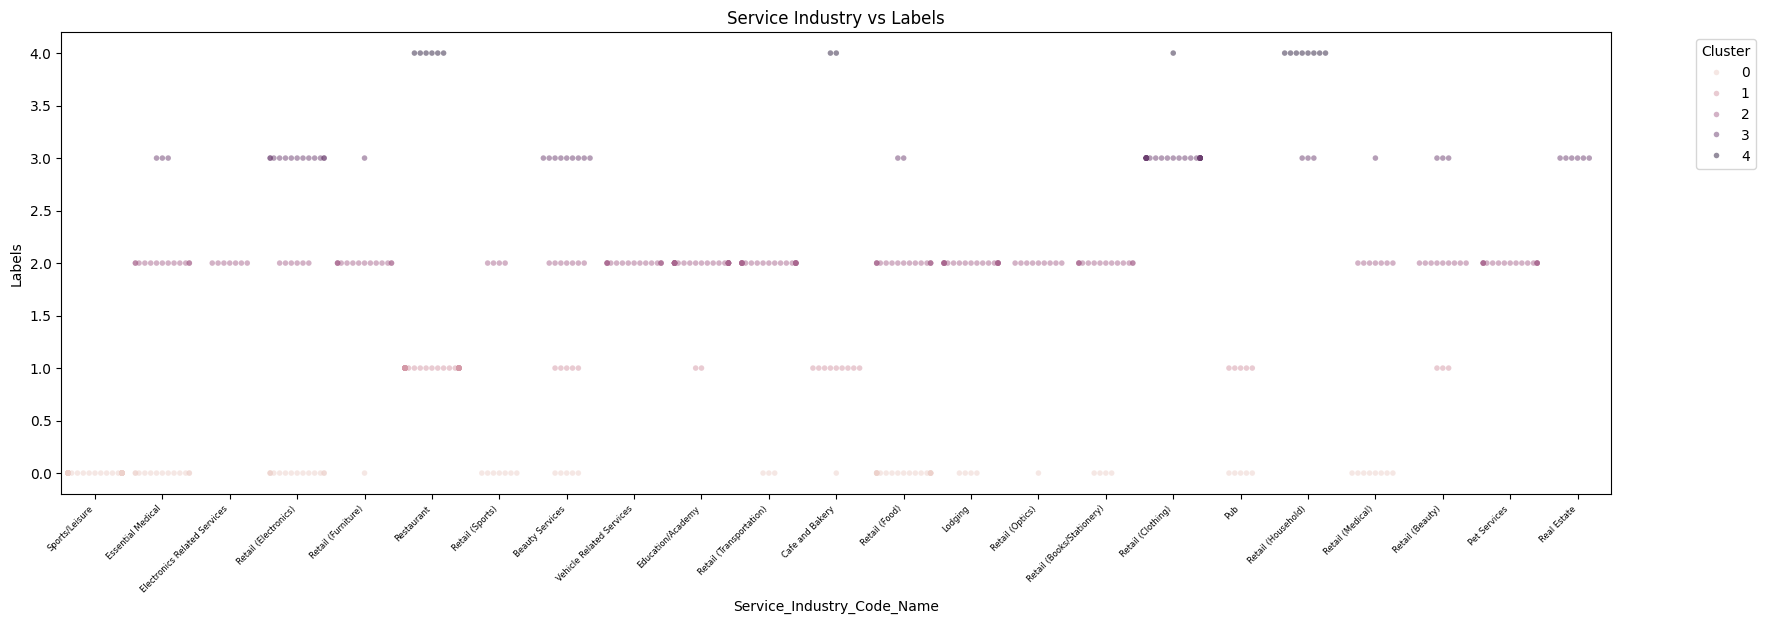

In [ ]:
plt.figure(figsize=(20, 6))
#sns.violinplot(x='Service_Industry_Code_Name', y='Labels', data=df_sample_1000, inner=None, palette='Set2')
sns.swarmplot(x='Service_Industry_Code_Name', y='Labels', hue='Labels', data=df_sample_1000, dodge=False, alpha=0.5, s=4)
#sns.stripplot(x='Service_Industry_Code_Name', y='Labels', hue='Labels', data=df_sample_1000, dodge=True, jitter=True, alpha=0.5, s=6)
plt.title('Service Industry vs Labels')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tick_params(axis='x', rotation=45, labelsize=6)

### 최종 결과

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 81.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 27.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 27.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 31.2% of the points cannot be placed; you may want to decrease the size of the markers or use s

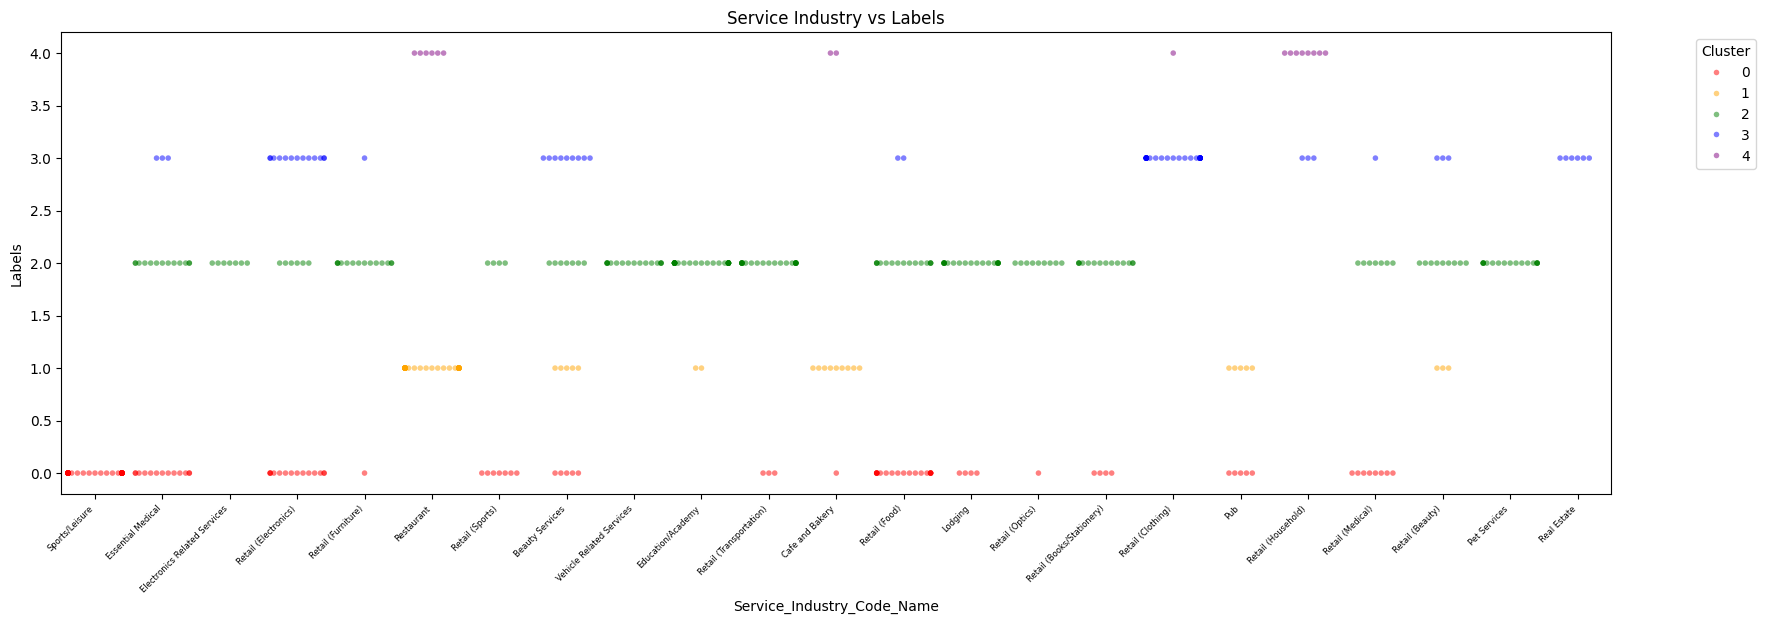

In [ ]:
# 각 Labels 값에 대해 색상을 지정
palette = {0: 'red', 1: 'orange', 2: 'green', 3:'blue', 4:'purple'}  #이것만 plot 뒤에 palette =palette 지정해주면 색 바뀜
plt.figure(figsize=(20, 6))
sns.swarmplot(x='Service_Industry_Code_Name', y='Labels', hue='Labels', data=df_sample_1000, dodge=False, alpha=0.5, s=4, palette=palette)
plt.title('Service Industry vs Labels')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tick_params(axis='x', rotation=45, labelsize=6)
plt.show()


점포 수에서 도드라지게 튀는 업종

Text(0.5, 1.0, 'Number_of_Stores')

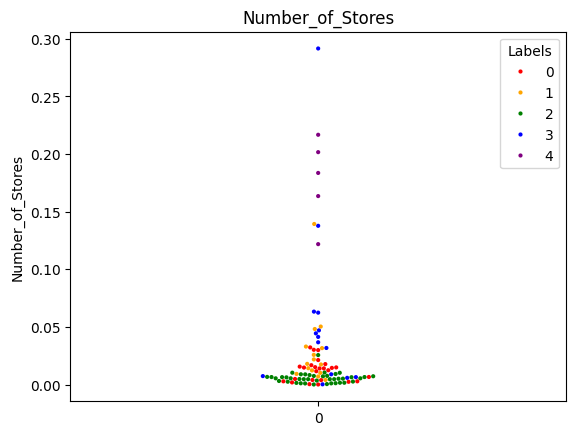

In [ ]:
sns.swarmplot(x=[0]*len(df_sample_100), y='Number_of_Stores', hue='Labels', data=df_sample_100, s=3, palette=palette)
plt.title('Number_of_Stores')

그 외 변수에서 두드러지는 업종 확인

[]

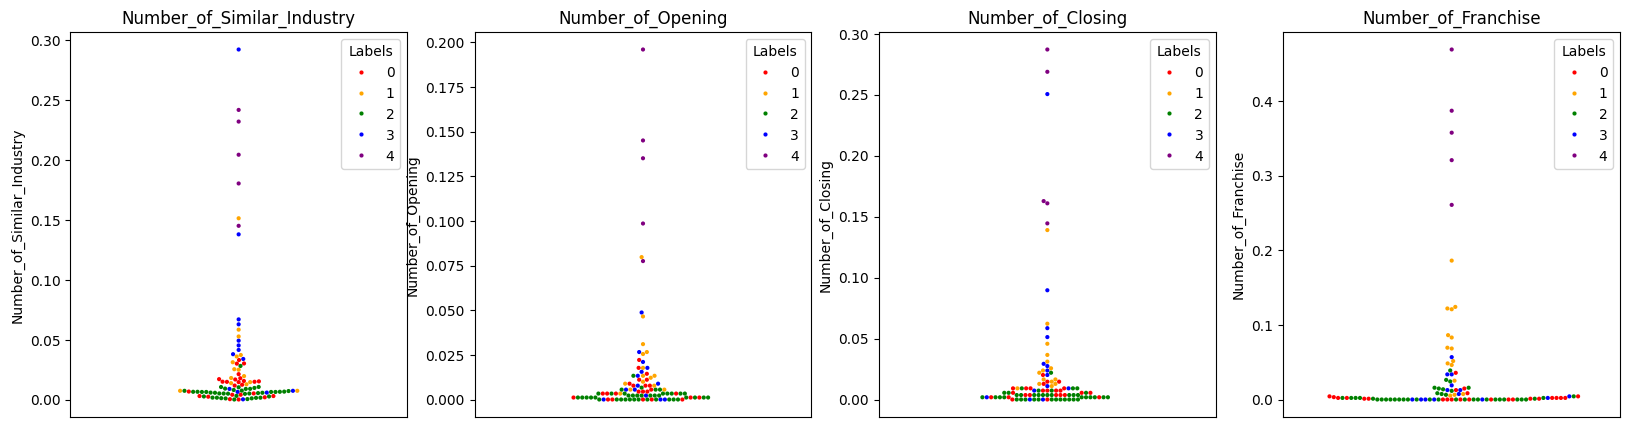

In [ ]:
# Create the figure and axes
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
sns.swarmplot(ax=axes[0], x=[2]*len(df_sample_100), y='Number_of_Similar_Industry', hue='Labels', data=df_sample_100, s=3, palette=palette)
axes[0].set_title('Number_of_Similar_Industry')
axes[0].set_xticks([])

sns.swarmplot(ax=axes[1], x=[3]*len(df_sample_100), y='Number_of_Opening', hue='Labels', data=df_sample_100, s=3, palette=palette)
axes[1].set_title('Number_of_Opening')
axes[1].set_xticks([])

sns.swarmplot(ax=axes[2], x=[4]*len(df_sample_100), y='Number_of_Closing', hue='Labels', data=df_sample_100, s=3, palette=palette)
axes[2].set_title('Number_of_Closing')
axes[2].set_xticks([])

sns.swarmplot(ax=axes[3], x=[5]*len(df_sample_100), y='Number_of_Franchise', hue='Labels', data=df_sample_100, s=3, palette=palette)
axes[3].set_title('Number_of_Franchise')
axes[3].set_xticks([])